In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
#matplotlib 한글 폰트 오류 문제 해결
font_path='./dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

## 1. 데이터 읽어오기
* 샘플 수 : 768
* 속성 : 8개
    * 속성 1 : pregnant(과거 임신 횟수)
    * 속성 2 : plasma(포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg)
    * 속성 3 : pressure(확장기 혈압(mm Hg)
    * 속성 4 : thicknes(삼두근 피부 주름 두께(mm)
    * 속성 5 : insulin(혈청 인슐린, 2-hour, mu U/ml)
    * 속성 6 : BMI(체질량 지수)
    * 속성 7 : pedigree(당뇨병 가족력)
    * 속성 8 : age(나이)
* 클래스 : 당뇨(1), 당뇨 아님(0)

In [2]:
df = pd.read_csv('./dataset/pima-indians-diabetes.csv', names = ["임신횟수", "공복혈당농도", "확장기 혈압",
                  "삼두근 피부 주름 두께", "혈청 인슐린", "체질량지수(BMI)", "당뇨병가족력", "나이", "class"])

df.head()

,임신횟수,공복혈당농도,확장기 혈압,삼두근 피부 주름 두께,혈청 인슐린,체질량지수(BMI),당뇨병가족력,나이,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,임신횟수,공복혈당농도,확장기 혈압,삼두근 피부 주름 두께,혈청 인슐린,체질량지수(BMI),당뇨병가족력,나이,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   임신횟수          768 non-null    int64  
 1   공복혈당농도        768 non-null    int64  
 2   확장기 혈압        768 non-null    int64  
 3   삼두근 피부 주름 두께  768 non-null    int64  
 4   혈청 인슐린        768 non-null    int64  
 5   체질량지수(BMI)    768 non-null    float64
 6   당뇨병가족력        768 non-null    float64
 7   나이            768 non-null    int64  
 8   class         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2. 데이터 살펴보기

#### 2.1 groupby 함수로 임신횟수와 당뇨병 여부 상관관계 확인

In [5]:
df_pregnant = df[['임신횟수', "class"]].groupby(['임신횟수'], as_index=False).mean().sort_values(by='임신횟수', ascending=True)
df_pregnant

,임신횟수,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


#### 2.2 상관관계 확인

C:\Users\seohwan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seohwan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


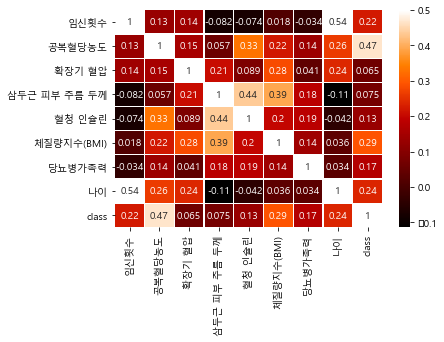

In [6]:
# 해당 상관관계를 통해 당뇨병여부는 공복 혈당농도 와 관련 있음을 확인할 수 있다.
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

#### 2.3 당뇨병 여부와 공복혈당 농도의 관계를 histogram으로 확인

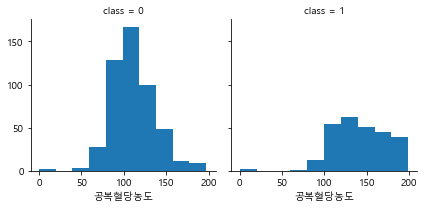

In [7]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, '공복혈당농도', bins=10)
plt.show()

## 3. Seed 설정

In [8]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

## 4. 데이터 로드

In [9]:
dataset = np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

## 5. 딥러닝 모델 설정

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

## 6. 딥러닝 실행

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=1000, batch_size= 50)

Train on 768 samples
Epoch 1/1000
768/768 [==============================] - 1s 684us/sample - loss: 10.4495 - accuracy: 0.6185
Epoch 2/1000
768/768 [==============================] - 0s 35us/sample - loss: 7.8628 - accuracy: 0.6146
Epoch 3/1000
768/768 [==============================] - 0s 34us/sample - loss: 5.5012 - accuracy: 0.6172
Epoch 4/1000
768/768 [==============================] - 0s 31us/sample - loss: 3.5789 - accuracy: 0.6367
Epoch 5/1000
768/768 [==============================] - 0s 34us/sample - loss: 2.3378 - accuracy: 0.6393
Epoch 6/1000
768/768 [==============================] - 0s 32us/sample - loss: 1.7018 - accuracy: 0.6224
Epoch 7/1000
768/768 [==============================] - 0s 32us/sample - loss: 1.4196 - accuracy: 0.6172
Epoch 8/1000
768/768 [==============================] - 0s 35us/sample - loss: 1.2804 - accuracy: 0.5807
Epoch 9/1000
768/768 [==============================] - 0s 32us/sample - loss: 1.1777 - accuracy: 0.5898
Epoch 10/1000
768/768 [=========

768/768 [==============================] - 0s 31us/sample - loss: 0.5838 - accuracy: 0.6888
Epoch 79/1000
768/768 [==============================] - 0s 32us/sample - loss: 0.5828 - accuracy: 0.6966
Epoch 80/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5765 - accuracy: 0.6901
Epoch 81/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.5756 - accuracy: 0.6953
Epoch 82/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5784 - accuracy: 0.7005
Epoch 83/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.5816 - accuracy: 0.6953
Epoch 84/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5759 - accuracy: 0.7018
Epoch 85/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.5823 - accuracy: 0.6953
Epoch 86/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.5792 - accuracy: 0.6875
Epoch 87/1000
768/768 [==============================] - 0s 

768/768 [==============================] - 0s 30us/sample - loss: 0.5423 - accuracy: 0.7253
Epoch 155/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.5518 - accuracy: 0.7096
Epoch 156/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5532 - accuracy: 0.7044
Epoch 157/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.5428 - accuracy: 0.7096
Epoch 158/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.5455 - accuracy: 0.7135
Epoch 159/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.5521 - accuracy: 0.7161
Epoch 160/1000
768/768 [==============================] - 0s 25us/sample - loss: 0.5484 - accuracy: 0.7201
Epoch 161/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5517 - accuracy: 0.7161
Epoch 162/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.5508 - accuracy: 0.7266
Epoch 163/1000
768/768 [============================

768/768 [==============================] - 0s 27us/sample - loss: 0.5291 - accuracy: 0.7174
Epoch 231/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.5310 - accuracy: 0.7292
Epoch 232/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.5414 - accuracy: 0.7201
Epoch 233/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.5333 - accuracy: 0.7122
Epoch 234/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.5306 - accuracy: 0.7214
Epoch 235/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.5325 - accuracy: 0.7240
Epoch 236/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.5451 - accuracy: 0.7044
Epoch 237/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5361 - accuracy: 0.7266
Epoch 238/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5307 - accuracy: 0.7227
Epoch 239/1000
768/768 [============================

768/768 [==============================] - 0s 30us/sample - loss: 0.5122 - accuracy: 0.7435
Epoch 307/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.5259 - accuracy: 0.7409
Epoch 308/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.5068 - accuracy: 0.7318
Epoch 309/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5332 - accuracy: 0.7396
Epoch 310/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.5214 - accuracy: 0.7409
Epoch 311/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.5174 - accuracy: 0.7448
Epoch 312/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5035 - accuracy: 0.7357
Epoch 313/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5203 - accuracy: 0.7422
Epoch 314/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.5031 - accuracy: 0.7357
Epoch 315/1000
768/768 [============================

768/768 [==============================] - 0s 29us/sample - loss: 0.4994 - accuracy: 0.7461
Epoch 383/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4934 - accuracy: 0.7630
Epoch 384/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4930 - accuracy: 0.7526
Epoch 385/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4880 - accuracy: 0.7487
Epoch 386/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4953 - accuracy: 0.7643
Epoch 387/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4970 - accuracy: 0.7513
Epoch 388/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4824 - accuracy: 0.7630
Epoch 389/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4813 - accuracy: 0.7643
Epoch 390/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4859 - accuracy: 0.7552
Epoch 391/1000
768/768 [============================

768/768 [==============================] - 0s 27us/sample - loss: 0.4831 - accuracy: 0.7539
Epoch 459/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.4717 - accuracy: 0.7708
Epoch 460/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4770 - accuracy: 0.7760
Epoch 461/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4774 - accuracy: 0.7526
Epoch 462/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4851 - accuracy: 0.7565
Epoch 463/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4791 - accuracy: 0.7656
Epoch 464/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4776 - accuracy: 0.7617
Epoch 465/1000
768/768 [==============================] - 0s 34us/sample - loss: 0.4677 - accuracy: 0.7591
Epoch 466/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4764 - accuracy: 0.7643
Epoch 467/1000
768/768 [============================

768/768 [==============================] - 0s 29us/sample - loss: 0.4727 - accuracy: 0.7565
Epoch 535/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4699 - accuracy: 0.7539
Epoch 536/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4659 - accuracy: 0.7656
Epoch 537/1000
768/768 [==============================] - 0s 35us/sample - loss: 0.4645 - accuracy: 0.7695
Epoch 538/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4660 - accuracy: 0.7708
Epoch 539/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4707 - accuracy: 0.7669
Epoch 540/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4608 - accuracy: 0.7878
Epoch 541/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4628 - accuracy: 0.7695
Epoch 542/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4684 - accuracy: 0.7721
Epoch 543/1000
768/768 [============================

768/768 [==============================] - 0s 30us/sample - loss: 0.4516 - accuracy: 0.7799
Epoch 611/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4521 - accuracy: 0.7865
Epoch 612/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4499 - accuracy: 0.7786
Epoch 613/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4568 - accuracy: 0.7734
Epoch 614/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4639 - accuracy: 0.7695
Epoch 615/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4620 - accuracy: 0.7643
Epoch 616/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4522 - accuracy: 0.7852
Epoch 617/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4568 - accuracy: 0.7812
Epoch 618/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4671 - accuracy: 0.7734
Epoch 619/1000
768/768 [============================

768/768 [==============================] - 0s 30us/sample - loss: 0.4464 - accuracy: 0.7773
Epoch 687/1000
768/768 [==============================] - 0s 35us/sample - loss: 0.4501 - accuracy: 0.7786
Epoch 688/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4487 - accuracy: 0.7695
Epoch 689/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4421 - accuracy: 0.7773
Epoch 690/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4541 - accuracy: 0.7799
Epoch 691/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4458 - accuracy: 0.7852
Epoch 692/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4466 - accuracy: 0.7773
Epoch 693/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4529 - accuracy: 0.7786
Epoch 694/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4635 - accuracy: 0.7721
Epoch 695/1000
768/768 [============================

768/768 [==============================] - 0s 30us/sample - loss: 0.4436 - accuracy: 0.7865
Epoch 763/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4460 - accuracy: 0.7812
Epoch 764/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4408 - accuracy: 0.7773
Epoch 765/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4447 - accuracy: 0.7799
Epoch 766/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4549 - accuracy: 0.7839
Epoch 767/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4515 - accuracy: 0.7747
Epoch 768/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4607 - accuracy: 0.7682
Epoch 769/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4464 - accuracy: 0.7826
Epoch 770/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4552 - accuracy: 0.7656
Epoch 771/1000
768/768 [============================

768/768 [==============================] - 0s 27us/sample - loss: 0.4364 - accuracy: 0.7786
Epoch 839/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.4368 - accuracy: 0.7812
Epoch 840/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4344 - accuracy: 0.7891
Epoch 841/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4399 - accuracy: 0.7839
Epoch 842/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4446 - accuracy: 0.7760
Epoch 843/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4456 - accuracy: 0.7747
Epoch 844/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4462 - accuracy: 0.7747
Epoch 845/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4369 - accuracy: 0.7826
Epoch 846/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4316 - accuracy: 0.7826
Epoch 847/1000
768/768 [============================

768/768 [==============================] - 0s 27us/sample - loss: 0.4317 - accuracy: 0.7812
Epoch 915/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.4325 - accuracy: 0.7865
Epoch 916/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4421 - accuracy: 0.7865
Epoch 917/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4367 - accuracy: 0.7891
Epoch 918/1000
768/768 [==============================] - 0s 31us/sample - loss: 0.4640 - accuracy: 0.7839
Epoch 919/1000
768/768 [==============================] - 0s 26us/sample - loss: 0.4349 - accuracy: 0.7721
Epoch 920/1000
768/768 [==============================] - 0s 30us/sample - loss: 0.4449 - accuracy: 0.7708
Epoch 921/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4295 - accuracy: 0.7760
Epoch 922/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4347 - accuracy: 0.7812
Epoch 923/1000
768/768 [============================

768/768 [==============================] - 0s 31us/sample - loss: 0.4275 - accuracy: 0.7747
Epoch 991/1000
768/768 [==============================] - 0s 32us/sample - loss: 0.4408 - accuracy: 0.7826
Epoch 992/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4391 - accuracy: 0.7747
Epoch 993/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4297 - accuracy: 0.7773
Epoch 994/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4230 - accuracy: 0.7799
Epoch 995/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4244 - accuracy: 0.7826
Epoch 996/1000
768/768 [==============================] - 0s 29us/sample - loss: 0.4305 - accuracy: 0.7799
Epoch 997/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4388 - accuracy: 0.7773
Epoch 998/1000
768/768 [==============================] - 0s 27us/sample - loss: 0.4441 - accuracy: 0.7812
Epoch 999/1000
768/768 [============================

In [12]:
print("Accuray : %.4f" % (model.evaluate(X, Y)[1]))

768/768 [==============================] - 0s 175us/sample - loss: 0.4310 - accuracy: 0.7917
Accuray : 0.7917
